In [1]:
from caveclient import CAVEclient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from standard_transform import minnie_ds
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

datastack_name = 'minnie65_public'
client = CAVEclient(datastack_name)

# Show the description of the datastack
client.info.get_datastack_info()['description']

# see the available materialization versions
client.materialize.get_versions()

versions = sorted(client.materialize.get_versions(), key = lambda v: client.materialize.get_timestamp(v))

for version in versions:
    print(f"Version {version}: {client.materialize.get_timestamp(version)}")

# CAVE always use the same version for consistency
client.version = 1621

print('done')

Version 117: 2021-06-11 08:10:00.215114+00:00
Version 343: 2022-02-24 08:10:00.184668+00:00
Version 661: 2023-04-06 20:17:09.199182+00:00
Version 795: 2023-08-23 08:10:01.404268+00:00
Version 943: 2024-01-22 08:10:01.497934+00:00
Version 1078: 2024-06-05 10:10:01.203215+00:00
Version 1181: 2024-09-16 10:10:01.121167+00:00
Version 1300: 2025-01-13 10:10:01.286229+00:00
Version 1412: 2025-04-29 10:10:01.200893+00:00
Version 1507: 2025-07-31 08:10:01.117494+00:00
Version 1621: 2025-11-25 08:10:01.094430+00:00
done


In [2]:
cell_type_df = client.materialize.tables.aibs_metamodel_celltypes_v661().query(split_positions = True, select_columns = ['pt_position', 'pt_root_id', 'cell_type'], limit = 1000000)

Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .


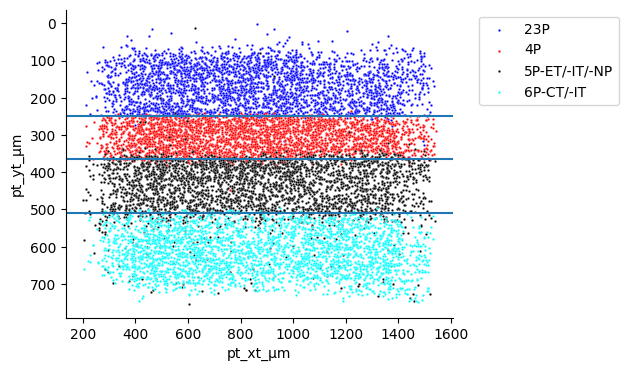

In [3]:
# how deep are the layers? -> let´s look at the differnet pyramidal cells to see aproxiamte layer depth
# cell_type_df -> all cells

type_23p = ['23P']
ltwothree = cell_type_df[cell_type_df['cell_type'].isin(type_23p)].copy()

type_4p = ['4P']
lfour = cell_type_df[cell_type_df['cell_type'].isin(type_4p)].copy()

type_5p = ['5P-ET', '5P-IT', '5P-NP']
lfive = cell_type_df[cell_type_df['cell_type'].isin(type_5p)].copy()

type_6p = ['6P-CT', '6P-IT']
lsix = cell_type_df[cell_type_df['cell_type'].isin(type_6p)].copy()

from functions import conversion_four, leveling_four, twod_graph, twod_graph_four
conversion_four(ltwothree, lfour, lfive, lsix)
leveling_four(ltwothree, lfour, lfive, lsix)
twod_graph_four(ltwothree, lfour, lfive, lsix, 3000, 3000, 3000, 3000, '23P', '4P', '5P-ET/-IT/-NP', '6P-CT/-IT', 250, 365, 510) # numbers reduced
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.savefig('layers.png', dpi  = 600, bbox_inches = 'tight')

Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .
Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .


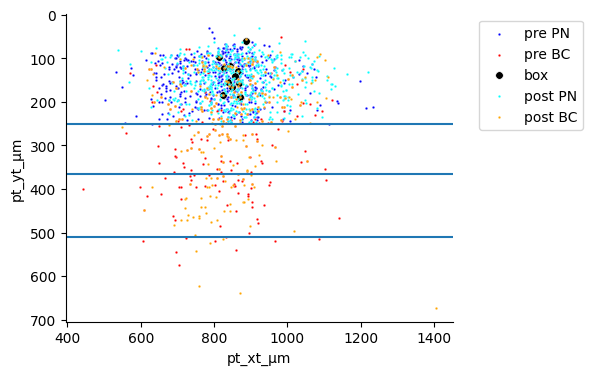

In [4]:
# L23

bounding_box = [[205809, 90000, 20001], [231809, 130000, 22501]] # the coordinates are in voxels | center point coordinates [218809, 161360, 21251]
box_23_df = client.materialize.tables.aibs_metamodel_celltypes_v661(cell_type = 'BC', pt_position_bbox = bounding_box).query(split_positions = True) # split positions true to prepare for further steps (coordinates)
# print(box_23_df)

example_root_id_23 = box_23_df['pt_root_id'].tolist()

from functions import inputs, outputs

cell_type_pre_df_23, _ = inputs(client, example_root_id_23) # Unterstrich ignores the second return from functions.py
cell_type_post_df_23, _ = outputs(client, example_root_id_23)

# print('INPUTS', cell_type_pre_df_23)
# print('OUTPUTS', cell_type_post_df_23)

my_type_one_23 = '23P' #, '4P', '5P-ET', '5P-IT', '5P-NP', '6P-CT', '6P-IT'
post_py_df_23 = cell_type_post_df_23[cell_type_post_df_23['cell_type'] == my_type_one_23].copy() # use cell_type_post_df_23[cell_type_post_df_23['cell_type'].isin(my_type_one_23)].copy() if my_type_one_23 has multiple conditions

my_type_bc_23 = 'BC'
post_bc_df_23 = cell_type_post_df_23[cell_type_post_df_23['cell_type'] == my_type_bc_23].copy()

pre_py_df_23 = cell_type_pre_df_23[cell_type_pre_df_23['cell_type'] == my_type_one_23].copy()
pre_bc_df_23 = cell_type_pre_df_23[cell_type_pre_df_23['cell_type'] == my_type_bc_23].copy()


from functions import conversion_five, leveling_five, twod_graph_pybcbox, twod_graph_pybcbox

conversion_five(pre_py_df_23, pre_bc_df_23, box_23_df, post_py_df_23, post_bc_df_23)
leveling_five(pre_py_df_23, pre_bc_df_23, box_23_df, post_py_df_23, post_bc_df_23)

twod_graph_pybcbox(pre_py_df_23, pre_bc_df_23, box_23_df, post_py_df_23, post_bc_df_23, 500, 250, 11, 500, 250, 'pre PN', 'pre BC', 'box', 'post PN', 'post BC', 250, 365, 510) # post pn size downsized
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.savefig('23Pbox.png', dpi  = 600, bbox_inches = 'tight')

In [5]:
from functions import analysis
analysis(cell_type_pre_df_23)

Total number of neurons (without Glia and Vascular Cells): 1412

Excitatory: 842
Inhibitory: 570

Percentage by CELL type:
all cells
Excitatory Neurons    43.223819
Inhibitory Neurons     29.26078
Vascular Cells        16.683778
Glia Cells            10.831622
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    59.631728
Inhibitory Neurons    40.368272
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P          562             28.850103  Excitatory Neurons   
4P           175              8.983573  Excitatory Neurons   
5P-ET          7              0.359343  Excitatory Neurons   
5P-IT         66               3.38809  Excitatory Neurons   
5P-NP          3              0.154004  Excitatory Neurons   
6P-CT         11              0.564682  Excitatory Neurons   
6P-IT      

In [6]:
from functions import analysis
analysis(cell_type_post_df_23)

Total number of neurons (without Glia and Vascular Cells): 5441

Excitatory: 4870
Inhibitory: 571

Percentage by CELL type:
all cells
Excitatory Neurons    83.376134
Inhibitory Neurons     9.775723
Vascular Cells         5.564116
Glia Cells             1.284027
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    89.505606
Inhibitory Neurons    10.494394
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P         3805             65.142955  Excitatory Neurons   
4P           487              8.337613  Excitatory Neurons   
5P-ET        168               2.87622  Excitatory Neurons   
5P-IT        251              4.297209  Excitatory Neurons   
5P-NP          7              0.119842  Excitatory Neurons   
6P-CT         82              1.403869  Excitatory Neurons   
6P-IT     

Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .
Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .


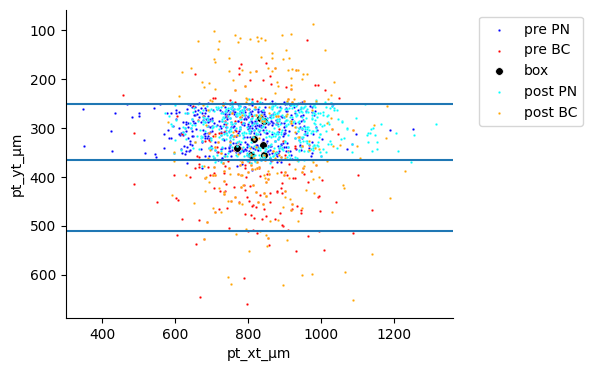

In [7]:
# L4

bounding_box = [[205809, 150000, 20001], [231809, 170000, 22501]] # the coordinates are in voxels | center point coordinates [218809, 161360, 21251]
box_4_df = client.materialize.tables.aibs_metamodel_celltypes_v661(cell_type = 'BC', pt_position_bbox = bounding_box).query(split_positions = True) # split positions true to prepare for further steps (coordinates)
# print(box_4_df)

example_root_id_4 = box_4_df['pt_root_id'].tolist()

from functions import inputs, outputs

cell_type_pre_df_4, _ = inputs(client, example_root_id_4) # Unterstrich ignores the second return from functions.py
cell_type_post_df_4, _ = outputs(client, example_root_id_4)

# print('INPUTS', cell_type_pre_df_4)
# print('OUTPUTS', cell_type_post_df_4)

my_type_one_4 = '4P' #, '5P-ET', '5P-IT', '5P-NP', '6P-CT', '6P-IT', '23P'
post_py_df_4 = cell_type_post_df_4[cell_type_post_df_4['cell_type'] == my_type_one_4].copy()

my_type_bc_4 = 'BC'
post_bc_df_4 = cell_type_post_df_4[cell_type_post_df_4['cell_type'] == my_type_bc_4].copy()

pre_py_df_4 = cell_type_pre_df_4[cell_type_pre_df_4['cell_type'] == my_type_one_4].copy()
pre_bc_df_4 = cell_type_pre_df_4[cell_type_pre_df_4['cell_type'] == my_type_bc_4].copy()


from functions import conversion_five, leveling_five, twod_graph_pybcbox, twod_graph_pybcbox

conversion_five(pre_py_df_4, pre_bc_df_4, box_4_df, post_py_df_4, post_bc_df_4)
leveling_five(pre_py_df_4, pre_bc_df_4, box_4_df, post_py_df_4, post_bc_df_4)

twod_graph_pybcbox(pre_py_df_4, pre_bc_df_4, box_4_df, post_py_df_4, post_bc_df_4, 500, 250, 7, 500, 250, 'pre PN', 'pre BC', 'box', 'post PN', 'post BC', 250, 365, 510) # post pn size downsized
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', frameon = True)

plt.savefig('4Pbox.png', dpi = 600, bbox_inches = 'tight')

In [8]:
from functions import analysis
analysis(cell_type_pre_df_4)

Total number of neurons (without Glia and Vascular Cells): 2454

Excitatory: 1859
Inhibitory: 595

Percentage by CELL type:
all cells
Excitatory Neurons    59.564242
Inhibitory Neurons    19.064402
Glia Cells             10.76578
Vascular Cells        10.605575
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    75.753871
Inhibitory Neurons    24.246129
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P          600             19.224607  Excitatory Neurons   
4P           926             29.669978  Excitatory Neurons   
5P-ET         50              1.602051  Excitatory Neurons   
5P-IT        206              6.600449  Excitatory Neurons   
5P-NP          8              0.256328  Excitatory Neurons   
6P-CT         31              0.993271  Excitatory Neurons   
6P-IT     

In [9]:
from functions import analysis
analysis(cell_type_post_df_4)

Total number of neurons (without Glia and Vascular Cells): 8397

Excitatory: 7499
Inhibitory: 898

Percentage by CELL type:
all cells
Excitatory Neurons    84.849513
Inhibitory Neurons     10.16067
Vascular Cells         3.677303
Glia Cells             1.312514
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    89.305704
Inhibitory Neurons    10.694296
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P         3386             38.311835  Excitatory Neurons   
4P          2861             32.371577  Excitatory Neurons   
5P-ET        215              2.432677  Excitatory Neurons   
5P-IT        691              7.818511  Excitatory Neurons   
5P-NP          8              0.090518  Excitatory Neurons   
6P-CT        163              1.844309  Excitatory Neurons   
6P-IT     

Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .
Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .


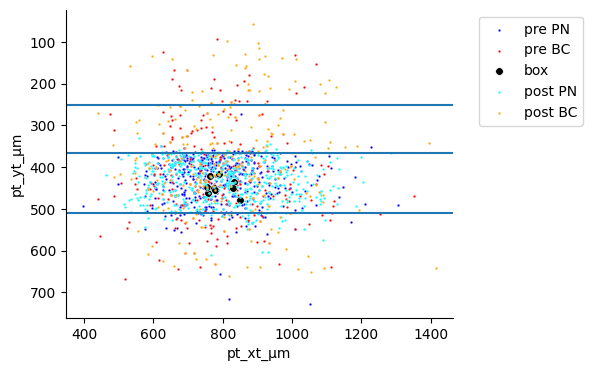

In [10]:
# L5

bounding_box = [[205809, 180000, 20001], [231809, 200000, 22501]] # the coordinates are in voxels | center point coordinates [218809, 161360, 21251]
box_5_df = client.materialize.tables.aibs_metamodel_celltypes_v661(cell_type = 'BC', pt_position_bbox = bounding_box).query(split_positions = True) # split positions true to prepare for further steps (coordinates)
# print(box_5_df)

example_root_id_5 = box_5_df['pt_root_id'].tolist()

from functions import inputs, outputs

cell_type_pre_df_5, _ = inputs(client, example_root_id_5) # Unterstrich ignores the second return from functions.py
cell_type_post_df_5, _ = outputs(client, example_root_id_5)

# print('INPUTS', cell_type_pre_df_5)
# print('OUTPUTS', cell_type_post_df_5)

my_type_one_5 = '5P-ET', '5P-IT', '5P-NP' #, '6P-CT', '6P-IT', '23P', '4P'
post_py_df_5 = cell_type_post_df_5[cell_type_post_df_5['cell_type'].isin(my_type_one_5)].copy()

my_type_bc_5 = 'BC'
post_bc_df_5 = cell_type_post_df_5[cell_type_post_df_5['cell_type'] == my_type_bc_5].copy()

pre_py_df_5 = cell_type_pre_df_5[cell_type_pre_df_5['cell_type'].isin(my_type_one_5)].copy()
pre_bc_df_5 = cell_type_pre_df_5[cell_type_pre_df_5['cell_type'] == my_type_bc_5].copy()


from functions import conversion_five, leveling_five, twod_graph_pybcbox, twod_graph_pybcbox

conversion_five(pre_py_df_5, pre_bc_df_5, box_5_df, post_py_df_5, post_bc_df_5)
leveling_five(pre_py_df_5, pre_bc_df_5, box_5_df, post_py_df_5, post_bc_df_5)

twod_graph_pybcbox(pre_py_df_5, pre_bc_df_5, box_5_df, post_py_df_5, post_bc_df_5, 500, 250, 9, 500, 250, 'pre PN', 'pre BC', 'box', 'post PN', 'post BC', 250, 365, 510) # post pn size downsized
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.savefig('5Pbox.png', dpi  = 600, bbox_inches = 'tight')

In [11]:
from functions import analysis
analysis(cell_type_pre_df_5)

Total number of neurons (without Glia and Vascular Cells): 3776

Excitatory: 2899
Inhibitory: 877

Percentage by CELL type:
all cells
Excitatory Neurons    61.878335
Inhibitory Neurons    18.719317
Glia Cells            12.358591
Vascular Cells         7.043757
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    76.774364
Inhibitory Neurons    23.225636
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P          781             16.670224  Excitatory Neurons   
4P           958             20.448239  Excitatory Neurons   
5P-ET        158              3.372465  Excitatory Neurons   
5P-IT        652             13.916756  Excitatory Neurons   
5P-NP         33              0.704376  Excitatory Neurons   
6P-CT        124              2.646745  Excitatory Neurons   
6P-IT     

In [12]:
from functions import analysis
analysis(cell_type_post_df_5)

Total number of neurons (without Glia and Vascular Cells): 12381

Excitatory: 10807
Inhibitory: 1574

Percentage by CELL type:
all cells
Excitatory Neurons    83.924827
Inhibitory Neurons    12.223344
Vascular Cells         2.531646
Glia Cells             1.320183
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    87.286972
Inhibitory Neurons    12.713028
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P         2999             23.289586  Excitatory Neurons   
4P          3658             28.407238  Excitatory Neurons   
5P-ET        743              5.769977  Excitatory Neurons   
5P-IT       2104             16.339209  Excitatory Neurons   
5P-NP         59              0.458181  Excitatory Neurons   
6P-CT        504              3.913955  Excitatory Neurons   
6P-IT  

Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .
Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .


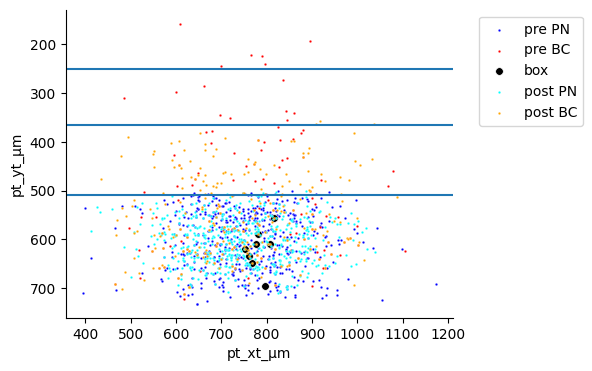

In [13]:
# L6

bounding_box = [[205809, 210000, 20001], [231809, 270000, 22501]] # the coordinates are in voxels | center point coordinates [218809, 161360, 21251]
box_6_df = client.materialize.tables.aibs_metamodel_celltypes_v661(cell_type = 'BC', pt_position_bbox = bounding_box).query(split_positions = True) # split positions true to prepare for further steps (coordinates)
# print(box_6_df)

example_root_id_6 = box_6_df['pt_root_id'].tolist()

from functions import inputs, outputs

cell_type_pre_df_6, _ = inputs(client, example_root_id_6) # Unterstrich ignores the second return from functions.py
cell_type_post_df_6, _ = outputs(client, example_root_id_6)

# print('INPUTS', cell_type_pre_df_6)
# print('OUTPUTS', cell_type_post_df_6)

my_type_one_6 = '6P-CT', '6P-IT' #, '23P', '4P', '5P-ET', '5P-IT', '5P-NP'
post_py_df_6 = cell_type_post_df_6[cell_type_post_df_6['cell_type'].isin(my_type_one_6)].copy()

my_type_bc_6 = 'BC'
post_bc_df_6 = cell_type_post_df_6[cell_type_post_df_6['cell_type'] == my_type_bc_6].copy()

pre_py_df_6 = cell_type_pre_df_6[cell_type_pre_df_6['cell_type'].isin(my_type_one_6)].copy()
pre_bc_df_6 = cell_type_pre_df_6[cell_type_pre_df_6['cell_type'] == my_type_bc_6].copy()


from functions import conversion_five, leveling_five, twod_graph_pybcbox, twod_graph_pybcbox

conversion_five(pre_py_df_6, pre_bc_df_6, box_6_df, post_py_df_6, post_bc_df_6)
leveling_five(pre_py_df_6, pre_bc_df_6, box_6_df, post_py_df_6, post_bc_df_6)

twod_graph_pybcbox(pre_py_df_6, pre_bc_df_6, box_6_df, post_py_df_6, post_bc_df_6, 500, 150, 8, 500, 250, 'pre PN', 'pre BC', 'box', 'post PN', 'post BC', 250, 365, 510) # post pn size downsized
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.savefig('6Pbox.png', dpi  = 600, bbox_inches = 'tight')

In [14]:
from functions import analysis
analysis(cell_type_pre_df_6)

Total number of neurons (without Glia and Vascular Cells): 1641

Excitatory: 1295
Inhibitory: 346

Percentage by CELL type:
all cells
Excitatory Neurons    52.091714
Glia Cells            20.836685
Inhibitory Neurons     13.91794
Vascular Cells         13.15366
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    78.915296
Inhibitory Neurons    21.084704
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P           91              3.660499  Excitatory Neurons   
4P           136              5.470636  Excitatory Neurons   
5P-ET         84              3.378922  Excitatory Neurons   
5P-IT        190                7.6428  Excitatory Neurons   
5P-NP         27              1.086082  Excitatory Neurons   
6P-CT        244              9.814964  Excitatory Neurons   
6P-IT     

In [15]:
from functions import analysis
analysis(cell_type_post_df_6)

Total number of neurons (without Glia and Vascular Cells): 3510

Excitatory: 3125
Inhibitory: 385

Percentage by CELL type:
all cells
Excitatory Neurons    79.113924
Inhibitory Neurons     9.746835
Vascular Cells         8.253165
Glia Cells             2.886076
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    89.031339
Inhibitory Neurons    10.968661
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P            1              0.025316  Excitatory Neurons   
4P             2              0.050633  Excitatory Neurons   
5P-ET        170              4.303797  Excitatory Neurons   
5P-IT        228              5.772152  Excitatory Neurons   
5P-NP         21              0.531646  Excitatory Neurons   
6P-CT       1145             28.987342  Excitatory Neurons   
6P-IT     